## RF and XGboost

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time


In [4]:
# load the california Housing dataset
data= fetch_california_housing()
X,y = data.data, data.target

In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17)

In [ ]:
### how many observations and features does the dataset have?

In [6]:
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 20640
Number of Features: 8


In [7]:
# Initialize models
n_estimators=100
rf=RandomForestRegressor(n_estimators=n_estimators, random_state=17)
xgb= XGBRegressor(n_estimators= n_estimators, random_state=17)

In [9]:
# Fit models
# Measure training time for RF
start_time_rf=time.time()
rf.fit(X_train, y_train)
end_time_rf= time.time()
rf_train_time=end_time_rf-start_time_rf

# measure training time for XGboost
start_time_xgb=time.time()
xgb.fit(X_train, y_train)
end_time_xgb =time.time()
xgb_train_time=end_time_xgb -start_time_xgb


In [13]:
# for the test data
# Measure training time for RF
start_time_rf=time.time()
y_pred_rf=rf.predict(X_test)
end_time_rf= time.time()
rf_pred_time=end_time_rf-start_time_rf

# measure training time for XGboost
start_time_xgb=time.time()
y_pred_xgb=xgb.predict(X_test)
end_time_xgb =time.time()
xgb_pred_time=end_time_xgb -start_time_xgb


In [11]:
# evauluation 
mse_rf= mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf=r2_score(y_test, y_pred_rf)
r2_xgb =r2_score(y_test, y_pred_xgb)

In [12]:
# print the MSE and R^2 values for both models
print(f'Random Forest: MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f' XGBoost:MSE ={mse_xgb:.4f}, R^2 ={r2_xgb:.4f}')

Random Forest: MSE = 0.2606, R^2 = 0.8007
 XGBoost:MSE =0.2397, R^2 =0.8167


In [18]:
# Print the timing for each model
print(f'Random Forest: Training Time={rf_train_time:.3f} seconds, Testing time ={rf_pred_time:.3f}')
print(f'XGboost: Training Time={xgb_train_time:.3f} seconds, Testing time ={xgb_pred_time:.3f}')

Random Forest: Training Time=0.229 seconds, Testing time =0.210
XGboost: Training Time=0.017 seconds, Testing time =0.009


In [19]:
# calculate the standard deviation of the test data
std_y=np.std(y_test)

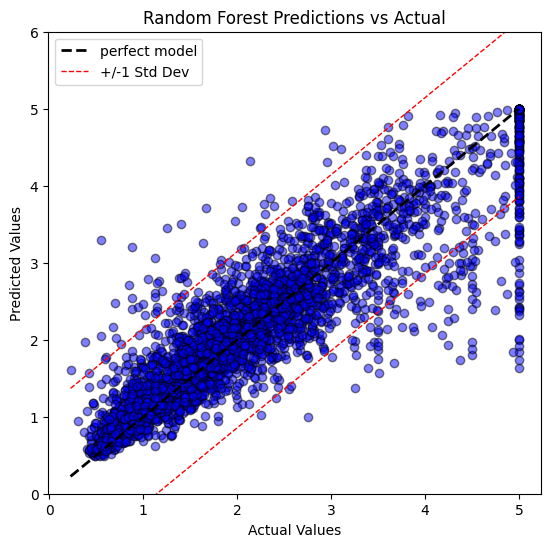

In [22]:
# VIsualize the results 
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

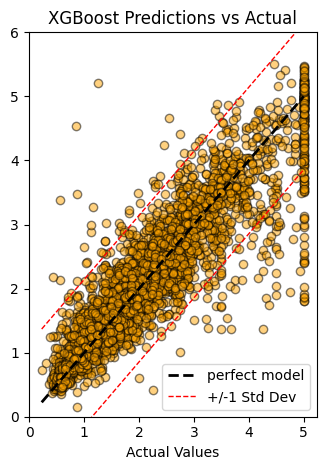

In [23]:
# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()